출처 : https://doorbw.tistory.com/169

In [220]:
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [222]:
from sklearn.preprocessing import LabelEncoder
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

In [223]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [224]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [225]:
train['Name'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [226]:
test['Name'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
test_titles = test['Name'].unique()
test_titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [227]:
train['Age'].fillna(-1, inplace=True)
test['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = train.Age[(train['Age'] != -1) & (train['Name'] == title)].median()
    medians[title] = median

In [228]:
for index, row in train.iterrows():
    if row['Age'] == -1:
        train.loc[index, 'Age'] = medians[row['Name']]

for index, row in test.iterrows():
    if row['Age'] == -1:
        test.loc[index, 'Age'] = medians[row['Name']]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [229]:
medians

{'Mr': 30.0,
 'Mrs': 35.0,
 'Miss': 21.0,
 'Master': 3.5,
 'Don': 40.0,
 'Rev': 46.5,
 'Dr': 46.5,
 'Mme': 24.0,
 'Ms': 28.0,
 'Major': 48.5,
 'Lady': 48.0,
 'Sir': 49.0,
 'Mlle': 24.0,
 'Col': 58.0,
 'Capt': 70.0,
 'the Countess': 33.0,
 'Jonkheer': 38.0}

In [230]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [232]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S


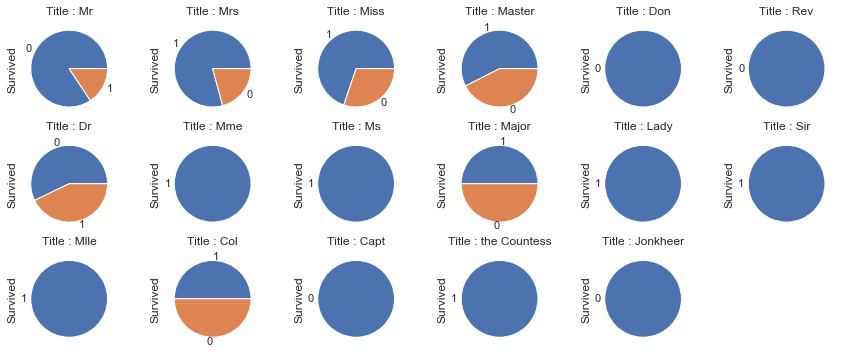

In [233]:
fig = plt.figure(figsize=(15, 6))

i = 1
for title in train['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train.Survived[train['Name'] == title].value_counts().plot(kind='pie')
    i += 1

In [234]:
title_replace = {
    'Don':0,
    'Rev':0,
    'Capt':0,
    'Jonkheer':0,
    'Mr':1,
    'Dr':2,
    'Major':3,
    'Col':3,
    'Master':4,
    'Miss':5,
    'Mrs':6,
    'Mme':7,
    'Ms':7,
    'Lady':7,
    'Sir':7,
    'Mlle':7,
    'the Countess':7
}

In [235]:
train['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [236]:
test['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [237]:
test[test['Name'] == 'Dona']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,Dona,0,39.0,0,0,PC 17758,108.9,C105,C


In [238]:
train['Name'] = train['Name'].apply(lambda x: title_replace.get(x))

In [239]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,6,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,5,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,6,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,1,35.0,0,0,373450,8.0500,NaN,S


In [240]:
test['Name'] = test['Name'].apply(lambda x: title_replace.get(x))

In [241]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             1
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [242]:
test[test['Name'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,NaN,0,39.0,0,0,PC 17758,108.9,C105,C


In [243]:
test[test['Sex'] == 0]['Name'].mean()

5.490066225165563

In [244]:
train[train['Sex'] == 0]['Name'].mean()

5.426751592356688

In [245]:
test[test['Name'].isnull()]['Sex']

414    0
Name: Sex, dtype: int32

In [246]:
test[test['Name'].isnull()]['Name']

414   NaN
Name: Name, dtype: float64

In [247]:
test['Name'] = test['Name'].fillna(value=train[train['Sex'] == 0]['Name'].mean())

In [248]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1.0,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,6.0,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,1.0,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,1.0,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,6.0,0,22.0,1,1,3101298,12.2875,NaN,S


In [249]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [250]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [251]:
train_test = [train, test]

In [252]:
for dataset in train_test:
    dataset.loc[ dataset['Age']<=6, 'Age'] = 0,
    dataset.loc[(dataset['Age']>6)&(dataset['Age']<=10), 'Age'] = 1,
    dataset.loc[(dataset['Age']>10)&(dataset['Age']<=20), 'Age'] = 2,
    dataset.loc[(dataset['Age']>20)&(dataset['Age']<=26), 'Age'] = 3,
    dataset.loc[(dataset['Age']>26)&(dataset['Age']<=30), 'Age'] = 4,
    dataset.loc[(dataset['Age']>30)&(dataset['Age']<=36), 'Age'] = 5,
    dataset.loc[(dataset['Age']>36)&(dataset['Age']<=40), 'Age'] = 6,
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=46), 'Age'] = 7,
    dataset.loc[(dataset['Age']>46)&(dataset['Age']<=50), 'Age'] = 8,
    dataset.loc[(dataset['Age']>50)&(dataset['Age']<=60), 'Age'] = 9,
    dataset.loc[ dataset['Age']>60, 'Age'] = 10

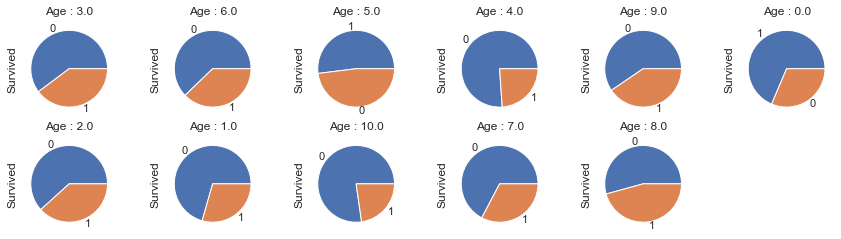

In [253]:
fig = plt.figure(figsize=(15, 6))

i = 1
for age in train['Age'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Age : {}'.format(age))
    train.Survived[train['Age'] == age].value_counts().plot(kind='pie')
    i += 1

In [254]:
age_point_replace = {
    0: 8, 
    1: 2,
    2: 4,
    3: 5,
    4: 1,
    5: 7,
    6: 4,
    7: 3,
    8: 6,
    9: 5,
    10: 0
}

In [255]:
for dataset in train_test:
    dataset['age_point'] = dataset['Age'].apply(lambda x: age_point_replace.get(x))

In [256]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,S,5
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,S,7
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,S,7


In [257]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,892,3,1.0,1,5.0,0,0,330911,7.8292,NaN,Q,7
1,893,3,6.0,0,8.0,1,0,363272,7.0000,NaN,S,6
2,894,2,1.0,1,10.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,1.0,1,4.0,0,0,315154,8.6625,NaN,S,1
4,896,3,6.0,0,3.0,1,1,3101298,12.2875,NaN,S,5


In [258]:
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [259]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [260]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,0,5
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,1,4
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,5
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,0,7
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,0,7


In [261]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,892,3,1.0,1,5.0,0,0,330911,7.8292,NaN,2,7
1,893,3,6.0,0,8.0,1,0,363272,7.0000,NaN,0,6
2,894,2,1.0,1,10.0,0,0,240276,9.6875,NaN,2,0
3,895,3,1.0,1,4.0,0,0,315154,8.6625,NaN,0,1
4,896,3,6.0,0,3.0,1,1,3101298,12.2875,NaN,0,5


In [262]:
for dataset in train_test:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [263]:
maybe_dad_mask = (train['FamilySize'] > 4) & (train['Sex'] == 1)

In [264]:
maybe_dad_mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [265]:
train['maybe_dad'] = 1

In [266]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,FamilySize,maybe_dad
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,0,5,2,1
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,1,4,2,1
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,5,1,1
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,0,7,2,1
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,0,7,1,1


In [267]:
train.loc[maybe_dad_mask, 'maybe_dad'] = 0

In [268]:
train[train['maybe_dad'] == 0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,FamilySize,maybe_dad
7,8,0,3,4,1,0.0,3,1,349909,21.0750,NaN,0,8,5,0
13,14,0,3,1,1,6.0,1,5,347082,31.2750,NaN,0,4,7,0
16,17,0,3,4,1,0.0,4,1,382652,29.1250,NaN,2,8,6,0
27,28,0,1,1,1,2.0,3,2,19950,263.0000,C23 C25 C27,0,4,6,0
50,51,0,3,4,1,1.0,4,1,3101295,39.6875,NaN,0,2,6,0


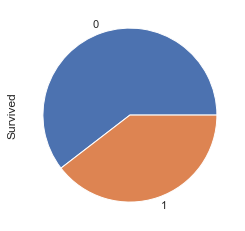

In [269]:
fig = plt.figure()
ax1 = train.Survived[train['maybe_dad'] == 1].value_counts().plot(kind='pie')

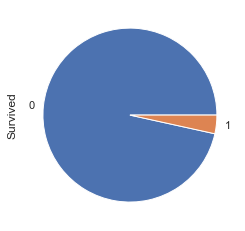

In [270]:
ax2 = train.Survived[train['maybe_dad'] == 0].value_counts().plot(kind='pie')

In [271]:
test['maybe_dad'] = 1
test_maybe_dad_mask = (test['FamilySize'] > 4) & (test['Sex'] == 1)
test.loc[test_maybe_dad_mask, 'maybe_dad'] = 0

In [272]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,FamilySize,maybe_dad
0,892,3,1.0,1,5.0,0,0,330911,7.8292,NaN,2,7,1,1
1,893,3,6.0,0,8.0,1,0,363272,7.0000,NaN,0,6,2,1
2,894,2,1.0,1,10.0,0,0,240276,9.6875,NaN,2,0,1,1
3,895,3,1.0,1,4.0,0,0,315154,8.6625,NaN,0,1,1,1
4,896,3,6.0,0,3.0,1,1,3101298,12.2875,NaN,0,5,3,1


In [273]:
train['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [274]:
test['FamilySize'].unique()

array([ 1,  2,  3,  5,  4,  6,  8,  7, 11], dtype=int64)

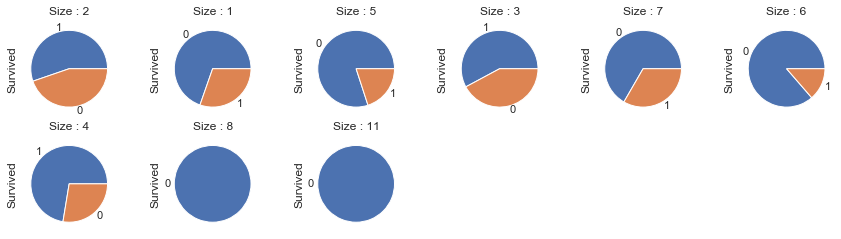

In [275]:
fig = plt.figure(figsize=(15, 6))

i=1
for size in train['FamilySize'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Size : {}'.format(size))
    train.Survived[train['FamilySize'] == size].value_counts().plot(kind='pie')
    i += 1

In [276]:
size_replace = {
    1: 3,
    2: 5, 
    3: 6, 
    4: 7, 
    5: 2,
    6: 1,
    7: 4, 
    8: 0, 
    11: 0
}

In [277]:
for dataset in train_test:
    dataset['fs_point'] = dataset['FamilySize'].apply(lambda x: size_replace.get(x))
    dataset.drop('FamilySize', axis=1, inplace=True)

In [278]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,maybe_dad,fs_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,0,5,1,5
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,1,4,1,5
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,5,1,3
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,0,7,1,5
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,0,7,1,3


In [279]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
age_point        0
maybe_dad        0
fs_point         0
dtype: int64

In [280]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
age_point        0
maybe_dad        0
fs_point         0
dtype: int64

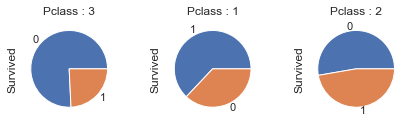

In [281]:
fig = plt.figure(figsize=(15, 6))

i=1
for x in train['Pclass'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Pclass : {}'.format(x))
    train.Survived[train['Pclass'] == x].value_counts().plot(kind='pie')
    i += 1

In [282]:
for dataset in train_test:
    dataset.loc[dataset['Pclass'] == 3, 'Pclass_point'] = 0
    dataset.loc[dataset['Pclass'] == 2, 'Pclass_point'] = 1
    dataset.loc[dataset['Pclass'] == 1, 'Pclass_point'] = 2

In [283]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,maybe_dad,fs_point,Pclass_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,0,5,1,5,0.0
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,1,4,1,5,2.0
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,5,1,3,0.0
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,0,7,1,5,2.0
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,0,7,1,3,0.0


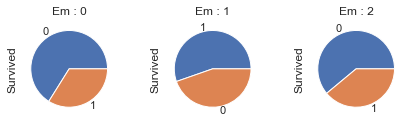

In [284]:
fig = plt.figure(figsize=(15, 6))

i=1
for x in train['Embarked'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Em : {}'.format(x))
    train.Survived[train['Embarked'] == x].value_counts().plot(kind='pie')
    i += 1

In [285]:
for dataset in train_test:
    dataset.loc[dataset['Embarked'] == 0, 'Em_point'] = 0
    dataset.loc[dataset['Embarked'] == 2, 'Em_point'] = 1
    dataset.loc[dataset['Embarked'] == 1, 'Em_point'] = 2

In [286]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,maybe_dad,fs_point,Pclass_point,Em_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,0,5,1,5,0.0,0.0
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,1,4,1,5,2.0,2.0
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,5,1,3,0.0,0.0
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,0,7,1,5,2.0,0.0
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,0,7,1,3,0.0,0.0


In [287]:
train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
age_point         0
maybe_dad         0
fs_point          0
Pclass_point      0
Em_point          0
dtype: int64

In [288]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [289]:
for data in train_test:
    data['Cabin'].fillna('U', inplace=True)
    data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
    data['Cabin'].unique()
    data['Fare'].fillna(0, inplace=True)
    data['Fare'] = data['Fare'].apply(lambda x: int(x))

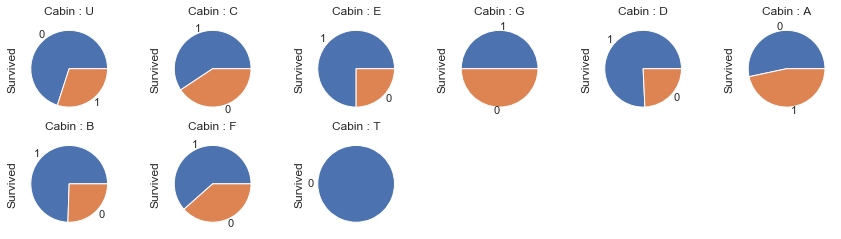

In [290]:
fig = plt.figure(figsize=(15, 6))

i=1
for x in train['Cabin'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Cabin : {}'.format(x))
    train.Survived[train['Cabin'] == x].value_counts().plot(kind='pie')
    i += 1

In [291]:
temp = train['Fare'].unique()
temp.sort()
temp

array([  0,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  46,  47,  49,  50,  51,  52,  53,  55,  56,  57,  59,  61,
        63,  65,  66,  69,  71,  73,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  86,  89,  90,  91,  93, 106, 108, 110, 113, 120, 133,
       134, 135, 146, 151, 153, 164, 211, 221, 227, 247, 262, 263, 512],
      dtype=int64)

In [292]:
for dataset in train_test:
    dataset.loc[dataset['Fare'] <= 30, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 80), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 80) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[(dataset['Fare'] > 100), 'Fare'] = 3

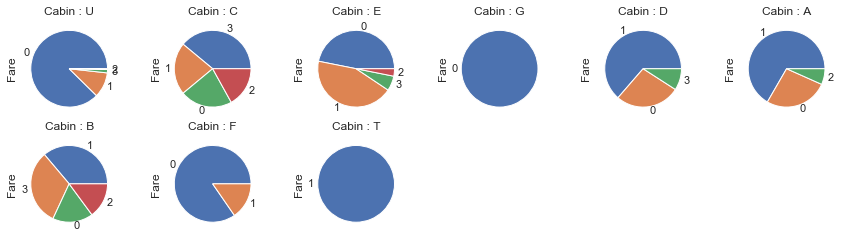

In [293]:
fig = plt.figure(figsize=(15, 6))

i = 1
for x in train['Cabin'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Cabin : {}'.format(x))
    train.Fare[train['Cabin'] == x].value_counts().plot(kind='pie')
    i += 1

In [294]:
for dataset in train_test:
    dataset.loc[(dataset['Cabin'] == 'U') & (dataset['Fare'] == 0), 'Cabin'] = 'G',
    dataset.loc[(dataset['Cabin'] == 'U') & (dataset['Fare'] == 1), 'Cabin'] = 'T',
    dataset.loc[(dataset['Cabin'] == 'U') & (dataset['Fare'] == 2), 'Cabin'] = 'C',
    dataset.loc[(dataset['Cabin'] == 'U') & (dataset['Fare'] == 3), 'Cabin'] = 'B'

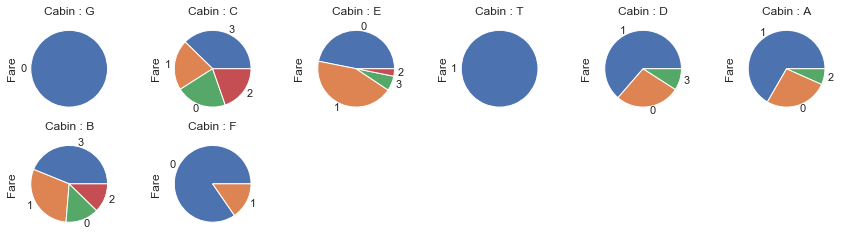

In [295]:
fig = plt.figure(figsize=(15, 6))

i = 1
for x in train['Cabin'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Cabin : {}'.format(x))
    train.Fare[train['Cabin'] == x].value_counts().plot(kind='pie')
    i += 1

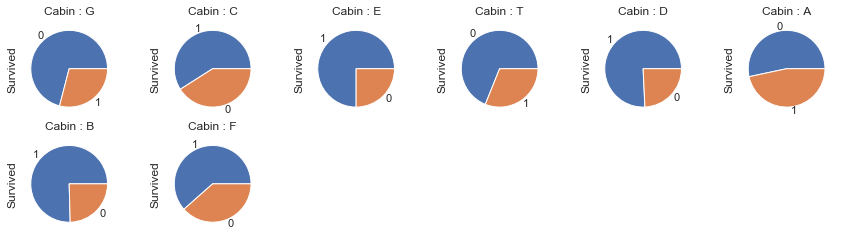

In [296]:
fig = plt.figure(figsize=(15, 6))

i = 1
for x in train['Cabin'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Cabin : {}'.format(x))
    train.Survived[train['Cabin'] == x].value_counts().plot(kind='pie')
    i += 1

In [297]:
for dataset in train_test:
    dataset.loc[(dataset['Cabin'] == 'G'), 'Cabin_point'] = 0,
    dataset.loc[(dataset['Cabin'] == 'C'), 'Cabin_point'] = 3,
    dataset.loc[(dataset['Cabin'] == 'E'), 'Cabin_point'] = 5,
    dataset.loc[(dataset['Cabin'] == 'T'), 'Cabin_point'] = 1,
    dataset.loc[(dataset['Cabin'] == 'D'), 'Cabin_point'] = 7,
    dataset.loc[(dataset['Cabin'] == 'A'), 'Cabin_point'] = 2,
    dataset.loc[(dataset['Cabin'] == 'B'), 'Cabin_point'] = 6,
    dataset.loc[(dataset['Cabin'] == 'F'), 'Cabin_point'] = 3

In [298]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,0,G,0,5,1,5,0.0,0.0,0.0
1,2,1,1,6,0,6.0,1,0,PC 17599,1,C,1,4,1,5,2.0,2.0,3.0
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,0,G,0,5,1,3,0.0,0.0,0.0
3,4,1,1,6,0,5.0,1,0,113803,1,C,0,7,1,5,2.0,0.0,3.0
4,5,0,3,1,1,5.0,0,0,373450,0,G,0,7,1,3,0.0,0.0,0.0


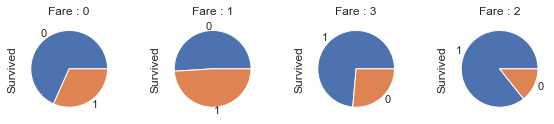

In [299]:
fig = plt.figure(figsize=(15, 6))

i = 1
for x in train['Fare'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Fare : {}'.format(x))
    train.Survived[train['Fare'] == x].value_counts().plot(kind='pie')
    i += 1

In [300]:
for dataset in train_test:
    dataset.loc[(dataset['Fare'] == 0), 'Fare_point'] = 0,
    dataset.loc[(dataset['Fare'] == 1), 'Fare_point'] = 1,
    dataset.loc[(dataset['Fare'] == 2), 'Fare_point'] = 3,
    dataset.loc[(dataset['Fare'] == 3), 'Fare_point'] = 2

In [301]:
train['Ticket'] = train['Ticket'].apply(lambda x: x[0])

In [302]:
test['Ticket'] = test['Ticket'].apply(lambda x: x[0])

In [303]:
train['Ticket'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64

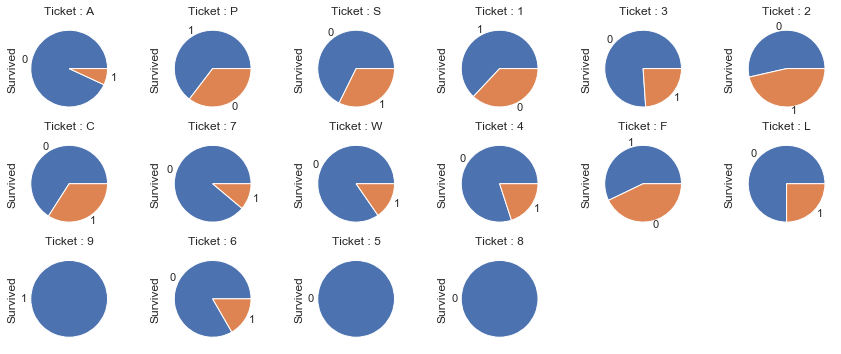

In [304]:
fig = plt.figure(figsize=(15, 6))
i =1
for ticket in train['Ticket'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Ticket : {}'.format(ticket))
    train.Survived[train['Ticket'] == ticket].value_counts().plot(kind='pie')
    i+=1

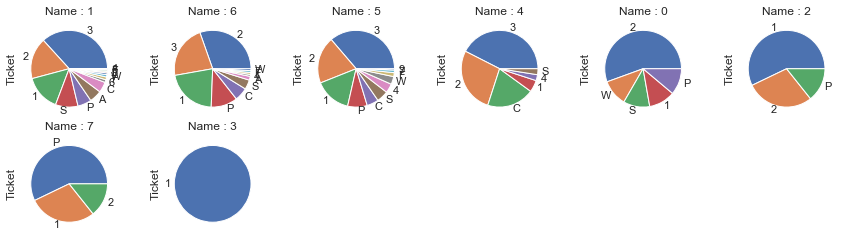

In [305]:
fig = plt.figure(figsize=(15, 6))
i =1
for ticket in train['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Name : {}'.format(ticket))
    train.Ticket[train['Name'] == ticket].value_counts().plot(kind='pie')
    i+=1

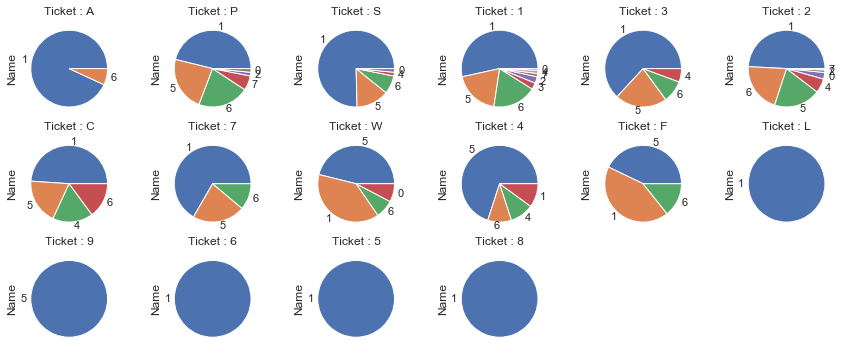

In [306]:
fig = plt.figure(figsize=(15, 6))
i =1
for ticket in train['Ticket'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Ticket : {}'.format(ticket))
    train.Name[train['Ticket'] == ticket].value_counts().plot(kind='pie')
    i+=1

### 4, 5, 6, 7의 비율이 큰 순서대로 값 매기기 -> 0.79904
### 5, 6, 7의 비율이 큰 순서대로 값 매기기 -> 0.80382

In [307]:
# 4, 5, 6, 7의 비율이 큰 순서대로 값 매기기 -> 0.79904
ticket_replace1 = {
    'A' : 11,
    'P' : 4,
    'S' : 10,
    '1' : 7,
    '3' : 8,
    '2' : 6,
    'C' : 3,
    '7' : 9,
    'W' : 5,
    '4' : 1,
    'F' : 2,
    'L' : 12,
    '9' : 0,
    '6' : 12,
    '5' : 12,
    '8' : 12
}

In [ ]:
# 5, 6, 7의 비율이 큰 순서대로 값 매기기 -> 0.80382
ticket_replace = {
    'A' : 11,
    'P' : 3,
    'S' : 10,
    '1' : 8,
    '3' : 9,
    '2' : 5,
    'C' : 6,
    '7' : 7,
    'W' : 4,
    '4' : 1,
    'F' : 2,
    'L' : 12,
    '9' : 0,
    '6' : 12,
    '5' : 12,
    '8' : 12
}

In [308]:
train['Ticket'] = train['Ticket'].apply(lambda x: ticket_replace.get(x))
test['Ticket'] = test['Ticket'].apply(lambda x: ticket_replace.get(x))

In [309]:
test['Ticket'].value_counts()

8     128
6      95
7      64
10     33
4      33
3      30
11     13
5       6
2       6
12      4
9       4
1       1
0       1
Name: Ticket, dtype: int64

In [310]:
from sklearn.preprocessing import StandardScaler
for dataset in train_test:
    dataset['Name'] = StandardScaler().fit_transform(dataset['Name'].values.reshape(-1, 1))
    dataset['Sex'] = StandardScaler().fit_transform(dataset['Sex'].values.reshape(-1, 1))
    dataset['maybe_dad'] = StandardScaler().fit_transform(dataset['maybe_dad'].values.reshape(-1, 1))
    dataset['fs_point'] = StandardScaler().fit_transform(dataset['fs_point'].values.reshape(-1, 1))
    dataset['Em_point'] = StandardScaler().fit_transform(dataset['Em_point'].values.reshape(-1, 1))
    dataset['Cabin_point'] = StandardScaler().fit_transform(dataset['Cabin_point'].values.reshape(-1, 1))
    dataset['Pclass_point'] = StandardScaler().fit_transform(dataset['Pclass_point'].values.reshape(-1, 1))
    dataset['age_point'] = StandardScaler().fit_transform(dataset['age_point'].values.reshape(-1, 1))
    dataset['Fare_point'] = StandardScaler().fit_transform(dataset['Fare_point'].values.reshape(-1, 1))
    dataset['Ticket'] = StandardScaler().fit_transform(dataset['Ticket'].values.reshape(-1, 1))

In [311]:
train.drop(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'Age'], axis=1, inplace=True)
test.drop(['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'Age'], axis=1, inplace=True)

In [312]:
train.head()

,Survived,Name,Sex,Ticket,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,0,-0.797294,0.737695,1.901897,0.401751,0.183419,0.894514,-0.827377,-0.585954,-0.560231,-0.512784
1,1,1.537975,-1.355574,-1.436727,-0.035319,0.183419,0.894514,1.566107,1.942303,0.853837,0.914998
2,1,1.070922,-1.355574,1.424951,0.401751,0.183419,-0.523657,-0.827377,-0.585954,-0.560231,-0.512784
3,1,1.537975,-1.355574,-0.005888,1.275892,0.183419,0.894514,1.566107,-0.585954,0.853837,0.914998
4,0,-0.797294,0.737695,0.471058,1.275892,0.183419,-0.523657,-0.827377,-0.585954,-0.560231,-0.512784


In [313]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [314]:
train_data.head()

,Name,Sex,Ticket,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,-0.797294,0.737695,1.901897,0.401751,0.183419,0.894514,-0.827377,-0.585954,-0.560231,-0.512784
1,1.537975,-1.355574,-1.436727,-0.035319,0.183419,0.894514,1.566107,1.942303,0.853837,0.914998
2,1.070922,-1.355574,1.424951,0.401751,0.183419,-0.523657,-0.827377,-0.585954,-0.560231,-0.512784
3,1.537975,-1.355574,-0.005888,1.275892,0.183419,0.894514,1.566107,-0.585954,0.853837,0.914998
4,-0.797294,0.737695,0.471058,1.275892,0.183419,-0.523657,-0.827377,-0.585954,-0.560231,-0.512784


In [315]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [316]:
test.shape

(418, 11)

In [317]:
train.shape

(891, 11)

In [318]:
train_data.shape

(891, 10)

In [319]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission_test6.csv', index=False)
submission = pd.read_csv('submission_test6.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
